In [115]:
import numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import contractions
import re
import fasttext
import gensim
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [2]:
harry_df=pd.read_csv(r'C:\Users\gtanwar2\Downloads\lightning.csv\lightning.csv')

In [3]:
harry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   720 non-null    int64  
 1   book         720 non-null    object 
 2   name         720 non-null    object 
 3   date         720 non-null    object 
 4   rating       690 non-null    object 
 5   likes        720 non-null    object 
 6   description  719 non-null    object 
 7   stars_given  690 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 45.1+ KB


In [4]:
harry_df.head()

,Unnamed: 0,book,name,date,rating,likes,description,stars_given
0,0,Harry Potter and the Sorcerer's Stone,MirandaReads,"Nov11,2019",itwasamazing,1657 likes,Stuck at home? Got some time on your hands? Wa...,5.0
1,1,Harry Potter and the Sorcerer's Stone,Kai,"Apr02,2015",NaN,993 likes,Let's do this thing where we promote and recom...,NaN
2,2,Harry Potter and the Sorcerer's Stone,Lora,"Jun03,2011",itwasamazing,1599 likes,I'm going to keep this brief since there isn't...,5.0
3,3,Harry Potter and the Sorcerer's Stone,★Jess,"Dec10,2009",itwasamazing,831 likes,My original review was a comparison of sorts b...,5.0
4,4,Harry Potter and the Sorcerer's Stone,Matthew,"Jan08,2013",itwasamazing,911 likes,One of my first jobs was at a bookstore. When ...,5.0


In [5]:
harry_df.columns

Index(['Unnamed: 0', 'book', 'name', 'date', 'rating', 'likes', 'description',
       'stars_given'],
      dtype='object')

In [6]:
harry_df.drop(columns=['Unnamed: 0','name'],inplace=True)

In [7]:
harry_df['book'].nunique()

8

In [9]:
harry_df['book'].unique()

array(["Harry Potter and the Sorcerer's Stone",
       'Harry Potter and the Deathly Hallows',
       'Harry Potter and the Prisoner of Azkaban',
       'Harry Potter and the Order of the Phoenix',
       'Harry Potter and the Chamber of Secrets',
       'Harry Potter and the Cursed Child: Parts One and Two',
       'Harry Potter and the Goblet of Fire',
       'Harry Potter and the Half-Blood Prince'], dtype=object)

In [10]:
harry_df['date']=harry_df['date'].apply(lambda x: x.split(',')[1])

C:\Users\gtanwar2\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


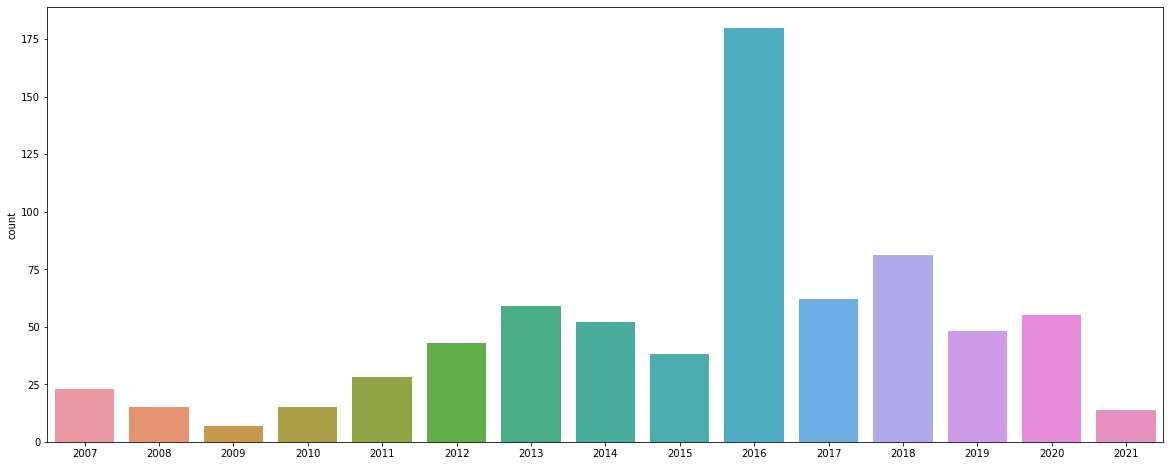

In [11]:
figure=plt.figure(figsize=(20,8))
x=sns.countplot(sorted(harry_df.date))

In [12]:
ratings=harry_df['rating'].unique()
print(ratings)

['itwasamazing' nan 'reallylikedit' 'didnotlikeit' 'likedit' 'itwasok']


In [13]:
harry_df['stars_given'].unique()

array([ 5., nan,  4.,  1.,  3.,  2.])

In [14]:
for rating in ratings:
    print(str(rating)+": "+str(harry_df[harry_df['rating']==rating]['stars_given'].unique()))

itwasamazing: [5.]
nan: []
reallylikedit: [4.]
didnotlikeit: [1.]
likedit: [3.]
itwasok: [2.]


In [15]:
harry_df.dropna(axis=0,subset=['description'],inplace=True)

In [16]:
harry_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719 entries, 0 to 719
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   book         719 non-null    object 
 1   date         719 non-null    object 
 2   rating       689 non-null    object 
 3   likes        719 non-null    object 
 4   description  719 non-null    object 
 5   stars_given  689 non-null    float64
dtypes: float64(1), object(5)
memory usage: 39.3+ KB


In [17]:
books=harry_df.book.unique()

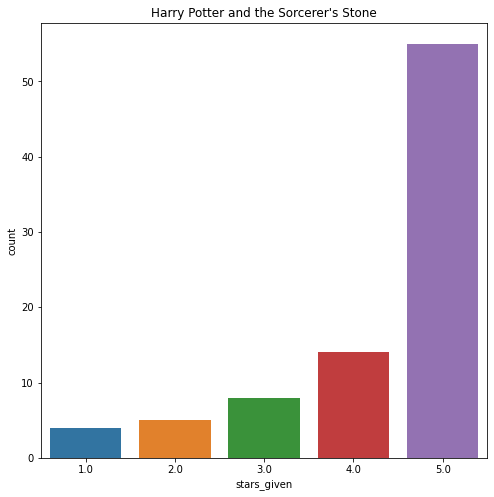

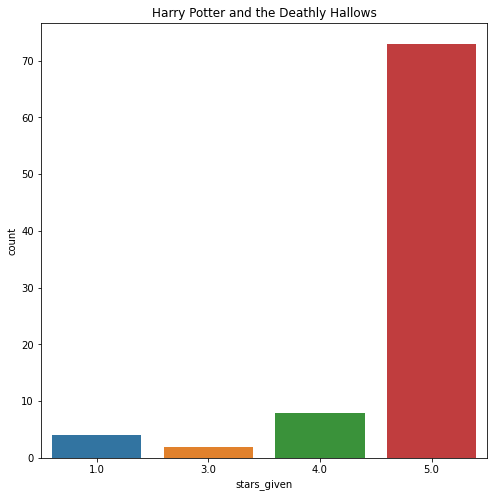

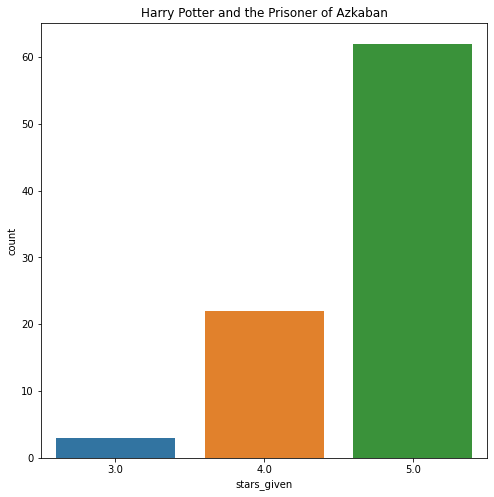

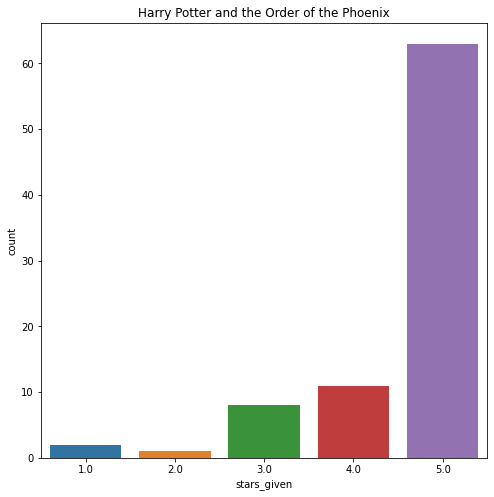

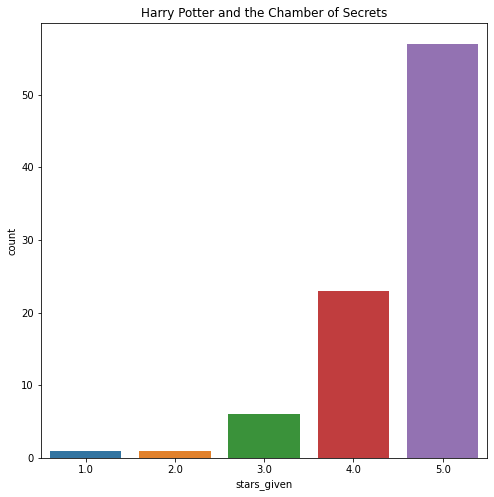

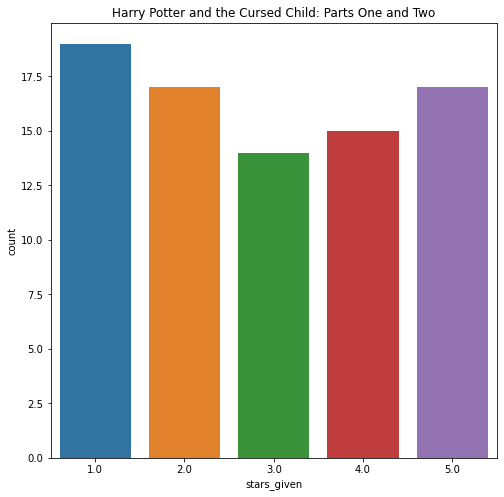

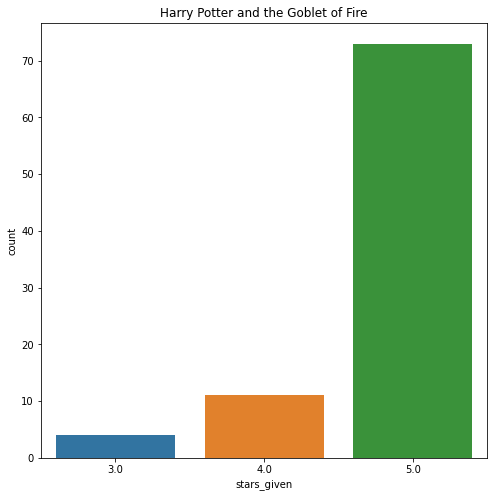

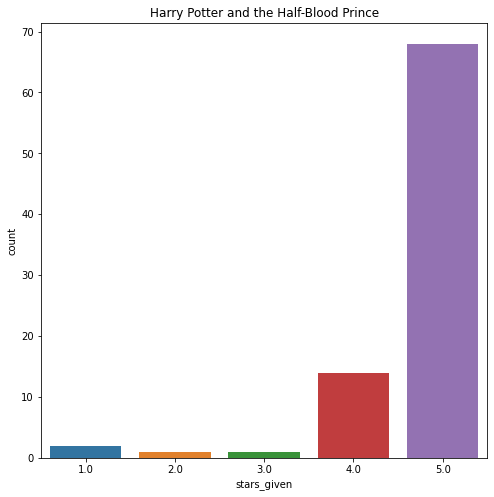

In [18]:
import warnings
warnings.filterwarnings("ignore")
for book in books:
#     print(book)
    figure=plt.figure(figsize=(8,8))
    sns.countplot(harry_df[harry_df.book==book]['stars_given'])
    plt.title(book)

In [19]:
harry_df.groupby(['book']).count()['stars_given']

book
Harry Potter and the Chamber of Secrets                 88
Harry Potter and the Cursed Child: Parts One and Two    82
Harry Potter and the Deathly Hallows                    87
Harry Potter and the Goblet of Fire                     88
Harry Potter and the Half-Blood Prince                  86
Harry Potter and the Order of the Phoenix               85
Harry Potter and the Prisoner of Azkaban                87
Harry Potter and the Sorcerer's Stone                   86
Name: stars_given, dtype: int64

In [20]:
harry_df.groupby(['book']).mean().sort_values('stars_given',ascending=False)

,stars_given
book,
Harry Potter and the Goblet of Fire,4.784091
Harry Potter and the Half-Blood Prince,4.686047
Harry Potter and the Deathly Hallows,4.678161
Harry Potter and the Prisoner of Azkaban,4.678161
Harry Potter and the Order of the Phoenix,4.552941
Harry Potter and the Chamber of Secrets,4.522727
Harry Potter and the Sorcerer's Stone,4.290698
Harry Potter and the Cursed Child: Parts One and Two,2.926829


In [21]:
harry_df.likes=harry_df.likes.apply(lambda x:int(x.split()[0]))

In [22]:
harry_df['calc_stars']=harry_df.likes*harry_df.stars_given

In [23]:
generated_ratings_df=harry_df.groupby(['book']).sum()

In [24]:
generated_ratings_df['normalised_ratings']=generated_ratings_df.calc_stars/generated_ratings_df.likes

In [25]:
generated_ratings_df.sort_values('normalised_ratings',ascending=False)

,likes,stars_given,calc_stars,normalised_ratings
book,,,,
Harry Potter and the Goblet of Fire,17254,421.0,79740.0,4.621537
Harry Potter and the Half-Blood Prince,12760,403.0,56973.0,4.464969
Harry Potter and the Chamber of Secrets,16661,398.0,74206.0,4.453874
Harry Potter and the Deathly Hallows,16256,407.0,71807.0,4.417261
Harry Potter and the Prisoner of Azkaban,21144,407.0,92638.0,4.381290
Harry Potter and the Order of the Phoenix,20655,387.0,86260.0,4.176229
Harry Potter and the Sorcerer's Stone,37839,369.0,136388.0,3.604429
Harry Potter and the Cursed Child: Parts One and Two,29942,240.0,74311.0,2.481832


## Text Analytics

In [26]:
sum(harry_df.description.apply(lambda x:x.find('http'))>0)

55

In [27]:
def remove_link(text):
    return re.sub(r'https?:\/\/\S*', '', text, flags=re.MULTILINE)


In [32]:
harry_df.description=harry_df.description.apply(lambda x:remove_link(x))

In [33]:
harry_df.description

0      Stuck at home? Got some time on your hands? Wa...
1      Let's do this thing where we promote and recom...
2      I'm going to keep this brief since there isn't...
3      My original review was a comparison of sorts b...
4      One of my first jobs was at a bookstore. When ...
                             ...                        
715    Buddy Re-Read continues!I read this last almos...
716    This is when Rowling really focused on the fin...
717    I still love this series after many rereads!Ha...
718    Oh man even 14 years later this ending SUCKS!I...
719    Trigger warnings: Child abuse, bullying, slave...
Name: description, Length: 719, dtype: object

In [34]:
def expand_contractions(text):
    expanded_words = []    
    for word in text.split():
        expanded_words.append(contractions.fix(word))   
    return ' '.join(expanded_words)

In [35]:
harry_df.description=harry_df.description.apply(lambda x:expand_contractions(x))    

In [36]:
def get_only_alpha(text):
    alpha_text=""
    for char in text:
        if char.isalpha() or char==" ":
            alpha_text+=char
        if char==".":
            alpha_text+=" "
    return alpha_text

In [42]:
def clean_text(text):
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\ufeff', ' ', text)
    text = re.sub(r'\'', ' ', text)
    text = re.sub(r'\n', " ",text)
    text = get_only_alpha(text)
    text = re.sub(r'[ÂàâéèÃïØº]','',text)
    return text

In [43]:
harry_df.description=harry_df.description.apply(lambda x:clean_text(x))

In [44]:
FASTEXT_MODEL_PATH = r'C:\Users\gtanwar2\Downloads\lid.176.bin'
def detect_lang(content):
    model = fasttext.load_model(FASTEXT_MODEL_PATH)
    langs = []
    for sent in content:
        sent = sent.replace("\n"," ")
        lang = model.predict(sent)[0]
        langs.append(str(lang)[11:13])
    return langs

In [45]:
harry_df['langs'] = detect_lang(harry_df['description'])

In [46]:
harry_df['langs'].nunique()

7

In [47]:
harry_df.langs.unique()

array(['en', 'it', 'fa', 'fi', 'es', 'zh', 'ja'], dtype=object)

In [48]:
harry_df.langs.value_counts()

en    700
fa      9
it      5
ja      2
es      1
fi      1
zh      1
Name: langs, dtype: int64

In [84]:
harry_df=harry_df[harry_df['langs']=='en']

In [85]:
harry_df.description=harry_df.description.apply(lambda text:text.lower())

In [89]:
def remove_small_token(text):
    filterd_tokens=[]
    for token in word_tokenize(text):
        if len(token)<=2:
            small_words.append(token)
        else:
            filterd_tokens.append(token)
    return filterd_tokens

In [91]:
from gensim.parsing.preprocessing import remove_stopwords
small_words=[]
harry_df.description=harry_df.description.apply(remove_stopwords).apply(remove_small_token) 

In [102]:
harry_df['pos_tag']=harry_df.description.apply(nltk.tag.pos_tag)

In [100]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [103]:
harry_df.pos_tag=harry_df.pos_tag.apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

In [109]:
wnl=WordNetLemmatizer()
harry_df['lemmatized_tokens']=harry_df['pos_tag'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])


In [110]:
def join_lemmas(x):
    content = ""
    for item in x:
        content = content+" "+item
    return content.strip()

In [112]:
harry_df.description=harry_df.lemmatized_tokens.apply(join_lemmas)

In [113]:
harry_df.head()

,book,date,rating,likes,description,stars_given,calc_stars,langs,pos_tag,lemmatized_tokens
0,Harry Potter and the Sorcerer's Stone,2019,itwasamazing,1657,stick home get time hand want start long serie...,5.0,8285.0,en,"[(stuck, v), (home, n), (got, v), (time, n), (...","[stick, home, get, time, hand, want, start, lo..."
1,Harry Potter and the Sorcerer's Stone,2015,NaN,993,let thing promote recommend favourite trans bo...,NaN,NaN,en,"[(let, v), (thing, n), (promote, v), (recommen...","[let, thing, promote, recommend, favourite, tr..."
2,Harry Potter and the Sorcerer's Stone,2011,itwasamazing,1599,go brief say clear throati think reason wait l...,5.0,7995.0,en,"[(going, v), (brief, n), (said, v), (clears, n...","[go, brief, say, clear, throati, think, reason..."
3,Harry Potter and the Sorcerer's Stone,2009,itwasamazing,831,original review comparison sort harry potter t...,5.0,4155.0,en,"[(original, a), (review, n), (comparison, n), ...","[original, review, comparison, sort, harry, po..."
4,Harry Potter and the Sorcerer's Stone,2013,itwasamazing,911,job bookstore kid mom mall spend ton time hang...,5.0,4555.0,en,"[(jobs, n), (bookstore, v), (kid, n), (mom, n)...","[job, bookstore, kid, mom, mall, spend, ton, t..."


In [228]:
cleaned_docs=harry_df.description

In [260]:
vectorizer = TfidfVectorizer(
                                lowercase=True,
                                max_features=100,
                                max_df=0.8,
                                min_df=5,
                                ngram_range = (2,3),
                                stop_words = "english"

                            )

In [261]:
vectors = vectorizer.fit_transform(cleaned_docs)


In [259]:
print(vectors[2])

  (0, 61)	0.5155584162433091
  (0, 32)	0.25356507321479854
  (0, 12)	0.4204350321933192
  (0, 60)	0.5071301464295971
  (0, 82)	0.4750793451982507
  (0, 30)	0.10127826587755252


In [262]:
feature_names = vectorizer.get_feature_names()
# import numpy as np
# print((feature_names=='stick'))
print(feature_names)

['best friend', 'binge mode', 'binge mode chapter', 'book book', 'book harry', 'book harry potter', 'book like', 'book love', 'book read', 'book review', 'book series', 'book time', 'chamber secret', 'chapter warn', 'contain adult', 'curse child', 'death eater', 'deathly hallow', 'deathly hallows', 'end book', 'entire series', 'favorite book', 'favorite character', 'feel like', 'fell love', 'felt like', 'fred george', 'halfblood prince', 'harry ginny', 'harry hermione', 'harry potter', 'harry potter book', 'harry potter chamber', 'harry potter curse', 'harry potter deathly', 'harry potter goblet', 'harry potter order', 'harry potter philosopher', 'harry potter prisoner', 'harry potter series', 'harry ron', 'harry ron hermione', 'hermione ron', 'hide spoiler', 'know harry', 'like book', 'like harry', 'look forward', 'lord voldemort', 'love book', 'love harry', 'love harry potter', 'magical world', 'mode chapter', 'mode chapter warn', 'order phoenix', 'philosopher stone', 'podcast binge'

In [263]:
dense = vectors.todense()

In [268]:
print ((dense[0].shape))

(1, 100)


In [198]:
print(dense[0])

[[0.         0.         0.         0.         0.29483449 0.35044663
  0.         0.         0.33873941 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.29074511 0.28599654 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.29351606 0.31081933 0.36693391 0.         0.
  0.         0.         0.33657452 0.         0.         0.2801882
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0

In [271]:
denselist = dense.tolist()
print(len(denselist[0]))

100


In [276]:
all_keywords = []
for description in denselist:
    print((description))
    x=0
    keywords = []
    for word in description:
        if word > 0:
            keywords.append(feature_names[x])
        x=x+1
    all_keywords.append(keywords)
    print(all_keywords)
    break

[0.0, 0.0, 0.0, 0.0, 0.2948344852452704, 0.35044663230598067, 0.0, 0.0, 0.33873941295654947, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29074510758319844, 0.2859965430889064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29351605573295664, 0.3108193290753543, 0.36693390679689775, 0.0, 0.0, 0.0, 0.0, 0.3365745150533359, 0.0, 0.0, 0.2801882003984592, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[['book harry', 'book harry potter', 'book read', 'harry potter', 'harry potter book', 'love book', 'love harry', 'love harry potter', 'philosopher stone', 'potter book']]


In [277]:
# print ("Original Text:")
# print (descriptions[0]+"\n")

# print ("Cleaned Text:")
# print (cleaned_docs[0]+"\n")

print ("Only Keywords Text:")
print (all_keywords[0])


Only Keywords Text:
['book harry', 'book harry potter', 'book read', 'harry potter', 'harry potter book', 'love book', 'love harry', 'love harry potter', 'philosopher stone', 'potter book']


In [278]:
true_k = 3

model = KMeans(n_clusters=true_k, init="k-means++", max_iter=100, n_init=1)

In [279]:
model.fit(vectors)

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [290]:
model.cluster_centers_[0].argsort()[::-1]

array([78, 30, 90, 23, 10, 49, 55, 43, 40, 45, 95, 48, 50,  4, 85, 97, 27,
       88, 12, 25, 19,  8, 96, 84, 16, 92,  7, 83, 93, 86,  3, 21, 77, 26,
       82, 81, 22, 76,  0, 91, 41, 47, 99, 42,  6, 94, 51, 11, 29, 20, 46,
        9, 15, 52, 44, 24, 98, 18, 17, 28,  1, 70, 36, 69, 35, 66, 59, 89,
        5, 68, 67, 56, 58, 57, 31,  2, 53, 13, 54, 79, 80, 60, 14, 39, 75,
       87, 65, 64, 34, 32, 74, 38, 73, 63, 62, 33, 71, 37, 72, 61],
      dtype=int64)

In [291]:
model.labels_

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0,
       2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 2, 0, 0, 1, 2, 2, 1, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0,
       2, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 2, 2, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,

In [172]:
i = 0
for cluster in order_centroids:
    print (f"Cluster {i}")
    for keyword in cluster[0:10]:
        print (terms[keyword])
    print ("")
    i=i+1

Cluster 0
read book
time read
harry potter
love book
like book
book time
hide spoiler
favorite character
year ago
sirius black

Cluster 1
harry potter
curse child
harry potter curse
potter curse
potter curse child
deathly hallow
feel like
potter deathly hallow
harry potter deathly
potter deathly

Cluster 2
harry potter
book series
potter book
harry potter book
feel like
potter series
harry potter series
order phoenix
love book
halfblood prince



In [155]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [156]:
kmean_indices = model.fit_predict(vectors)

pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(vectors.toarray())

In [157]:
colors = ["r", "b", "m", "y", "c"]

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]

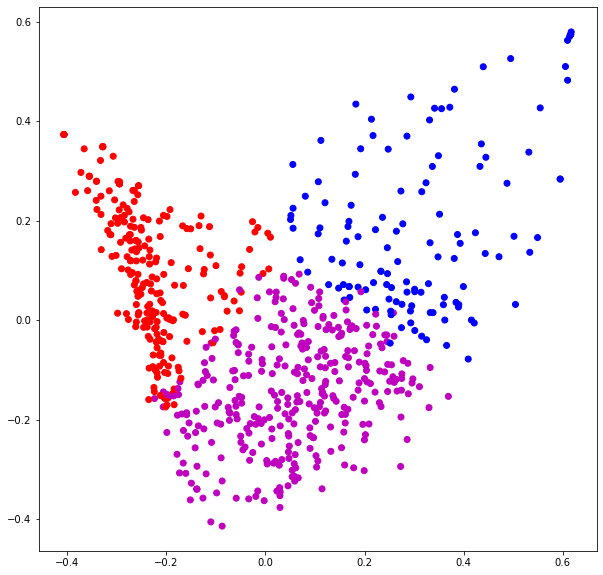

In [158]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmean_indices])

In [2]:
# fig, ax = plt.subplots(figsize=(50, 50))
# ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmean_indices])
# for i, txt in enumerate(names):
#     ax.annotate(txt[0:5], (x_axis[i], y_axis[i]))